# DS106-02-03-ML - k-Means Clustering in Python
---

## Import Packages

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

---
## Load in Data

In [2]:
# load data -> seaborn dataset `iris`
iris = sns.load_dataset('iris')

---
## Question Setup
With this analysis, you are trying to predict which type of iris (`species`) a flower will be based on the other variables in the dataset - `length` and `width` of the various flower parts.

---
## Data Wrangling

#### Scaling Your Data
- KNN is based completely on distance from one point to another, so you need to make sure that all of the data is on the same scale. 
- If some of the variables were in inches and some of it was in yards, it could do some funky things to your results. 
- Luckily, `sklearn` has the `StandardScaler()` tool just for such a happenstance!

In [3]:
# fit the StandardScaler function to your predictive data
# leaving out target variable `species`
scaler = StandardScaler()
scaler.fit(iris.drop('species', axis=1))

StandardScaler()

In [4]:
# Transform the data, save to variable, and turn into dataframe
scaledVariables = scaler.transform(iris.drop('species',axis=1))
irisScaled = pd.DataFrame(scaledVariables, columns=iris.columns[:-1])

In [5]:
# view result
irisScaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#### Creating x and y Datasets
Now you'll need to subset your x and y data:

In [6]:
x = irisScaled
y = iris['species']

---
## Train Test Split
- The next step is to do the train/test split. 
- The basis of train_test_split() is just to separate your data, and you can apply many different machine learning techniques to the data once you’ve used train_test_split.
> - `x` is the dataset you have scaled and are testing (independent variables) 
> - and `y` is the thing you are predicting (dependent variables). 
> - The argument `random_state=` does not usually have to be set, but, in this case, it will make your results line up with the example.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

---
# KNN Analysis
Now that you've taken care of the setup, it is time to take a trial run and actually perform KNN!
> - use `KNeighborsClassifier()` function 
> - specifying the number of neighbors with the argument `n_neighbors=`
> - fitting it to your model and predicting 

> In this case the number of neighbors is one to start with.

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

---
## Interpret KNN Predictions
You can look at pred by itself, as shown below, but it is hard to understand:

In [9]:
pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor'], dtype=object)

You can use some other `sklearn` tools to make this pretty and usable. 
- use function `confusion_matrix()` 
- and function `classification_report()`

In [10]:
# look at confusion matrix
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


To verify the accuracy, use function `classification_report()`:

In [11]:
# verify accuracy with classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



You want to focus on the `precision` column here.
> The KNN algorithm was...
> - 100% correct about predicting which iris plants will be of the setosa species
> - 95% accurate in predicting the versicolor species
> - 92% accurate in predicting the virginica species. 

Awesome! You can also look at the weighted avg row for precision, which gives an overall value of 96%.

---
## Choose the Best Model
What if you wanted to get that accuracy level just a bit higher?
You could try using the _Elbow Method_, which is a way to plot error to see which number of neighbors is best.

In [12]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

- The first line of this creates an empty list called `errorRate`
- Then you set up a for loop that will run the test on every `k` between 1 and 40 with the `range()` function. 
- Finally, it adds the `mean` of the error rate to the empty list. 

You can look at the list now, but it is a little hard to understand:

In [13]:
errorRate

[0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.0,
 0.0,
 0.0,
 0.022222222222222223,
 0.0,
 0.0,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.08888888888888889,
 0.1111111111111111,
 0.1111111111111111,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.13333333333333333,
 0.15555555555555556,
 0.13333333333333333,
 0.13333333333333333,
 0.1111111111111111]

#### Plot to visualize the results

Text(0, 0.5, 'Error Rate')

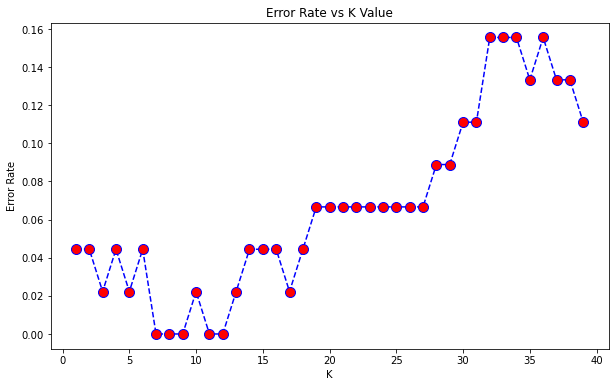

In [14]:
# plot the results
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### In this case, 7, 8, 9, 11, and 12 are all k values that are equally low. Almost no error there!

## Run the Final Model
The final step is simply to use one of these _k_ values in the model:

In [15]:
# run the model using one of the k values
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [16]:
# look at confusion matrix again
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [17]:
# verify accuracy with classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### When you ran the KNN again with k=8, you were able to predict the species of iris with 100% accuracy! Excellent work!